<a href="https://colab.research.google.com/github/pmargarete/CCADMACL_EXERCISES_COM222/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('netflix.csv')

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
# Dropping
df_afterdrop = df.drop(columns=['show_id', 'title', 'description', 'date_added', 'director', 'cast'])


In [10]:
#Get list of categorical variables
s = (df_afterdrop.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['type', 'country', 'rating', 'duration', 'listed_in']


In [11]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df_afterdrop[i]=df_afterdrop[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [12]:
from sklearn.preprocessing import StandardScaler

#Scaling
scaler = StandardScaler()
scaler.fit(df_afterdrop)
scaled_df = pd.DataFrame(scaler.transform(df_afterdrop),columns= df_afterdrop.columns )
print("All features are now scaled")

All features are now scaled


In [13]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modeling:")
scaled_df.head()

Dataframe to be used for further modeling:


,type,country,release_year,rating,duration,listed_in
0,1.493694,-1.975883,0.692878,0.486133,0.631633,1.083000
1,-0.669481,-0.524301,0.236092,0.486133,1.351048,0.381107
2,-0.669481,-0.141169,-0.334890,-1.049159,1.130582,0.588484
3,-0.669481,0.776188,-0.563284,-1.560922,1.176996,-1.716598
4,-0.669481,0.776188,-0.677480,-1.560922,-0.725973,0.253490


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["PC1","PC2", "PC3", "PC4", "PC5"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,7787.0,9.124730e-18,1.338965,-5.822665,-0.831834,-0.146537,1.029598,3.378037
PC2,7787.0,-2.007441e-17,1.071152,-4.289219,-0.796892,-0.158211,0.921261,2.553350
PC3,7787.0,-5.474838e-18,1.019888,-2.947469,-0.762791,0.090759,0.773742,5.311988
PC4,7787.0,-4.562365e-18,0.882765,-7.668001,-0.438098,0.044174,0.545852,2.533548
PC5,7787.0,-3.056785e-17,0.869510,-3.132255,-0.578870,-0.079688,0.526172,3.635243


In [35]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

PC4_explainedvariance = explained_variance[3]
print("Explained variance of PC4", PC4_explainedvariance)

PC5_explainedvariance = explained_variance[4]
print("Explained variance of PC5", PC5_explainedvariance)

Explained variance of PC1 0.2987662437378901
Explained variance of PC2 0.19120316749712934
Explained variance of PC3 0.17333976077035065
Explained variance of PC4 0.12986218464319454
Explained variance of PC5 0.12599185340217683


2. Create a scree plot for each principal component

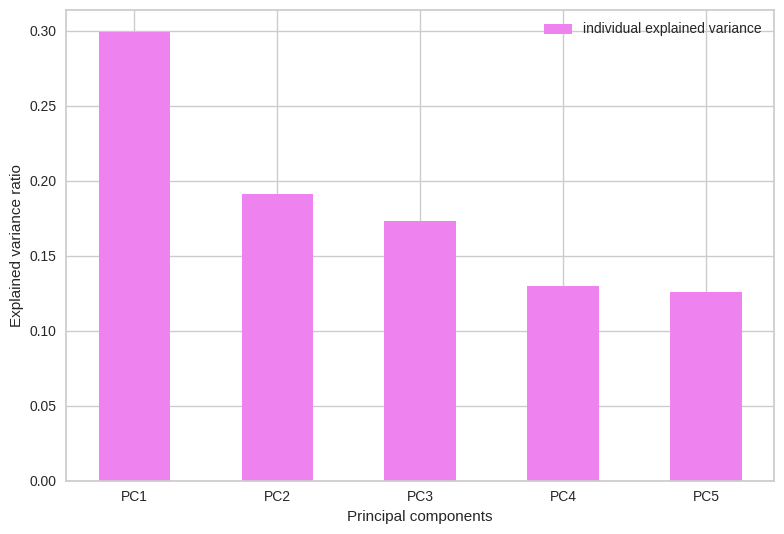

In [36]:
import matplotlib.pyplot as plt
from matplotlib import colors

plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

3. Use any clustering algorithm to create clusters

Elbow Method to determine the number of clusters to be formed:


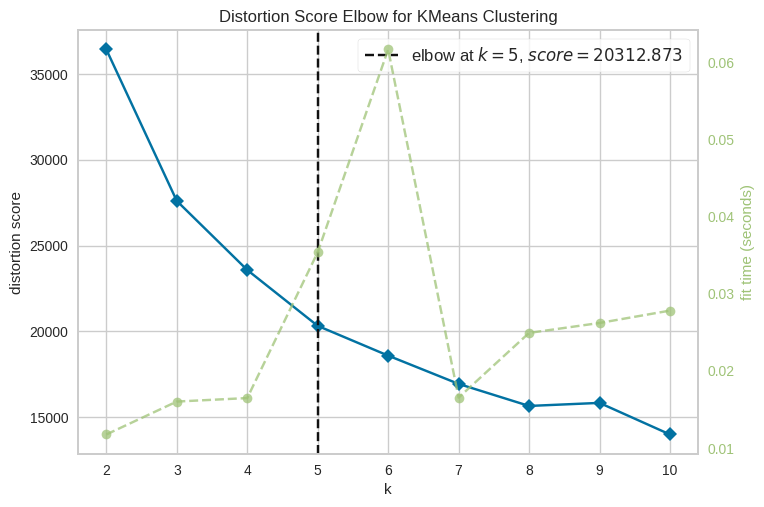

In [37]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

#ELBOW
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

#optimal number of clusters from elbow
n_clusters = Elbow_M.elbow_value_

#Apply KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(PCA_ds)

#Add the cluster as a column to DF
PCA_ds["Clusters"] = kmeans.labels_

4. Profile each cluster that you have generated based on your experiments

<ipython-input-40-344498bcc705>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)


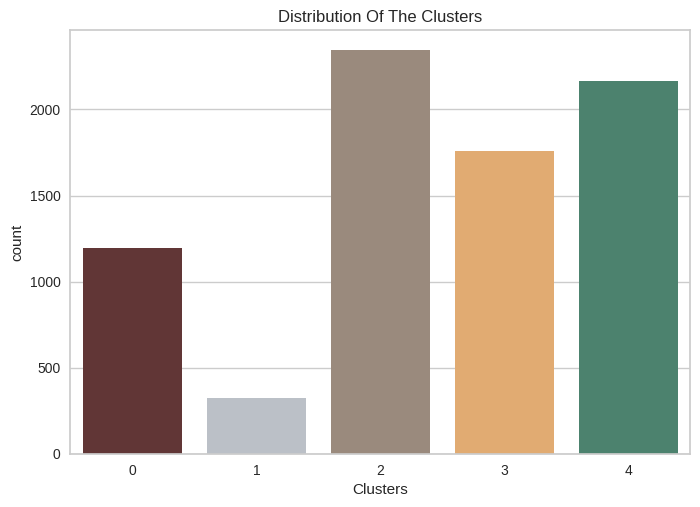

In [40]:
import seaborn as sns

#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#438B70"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

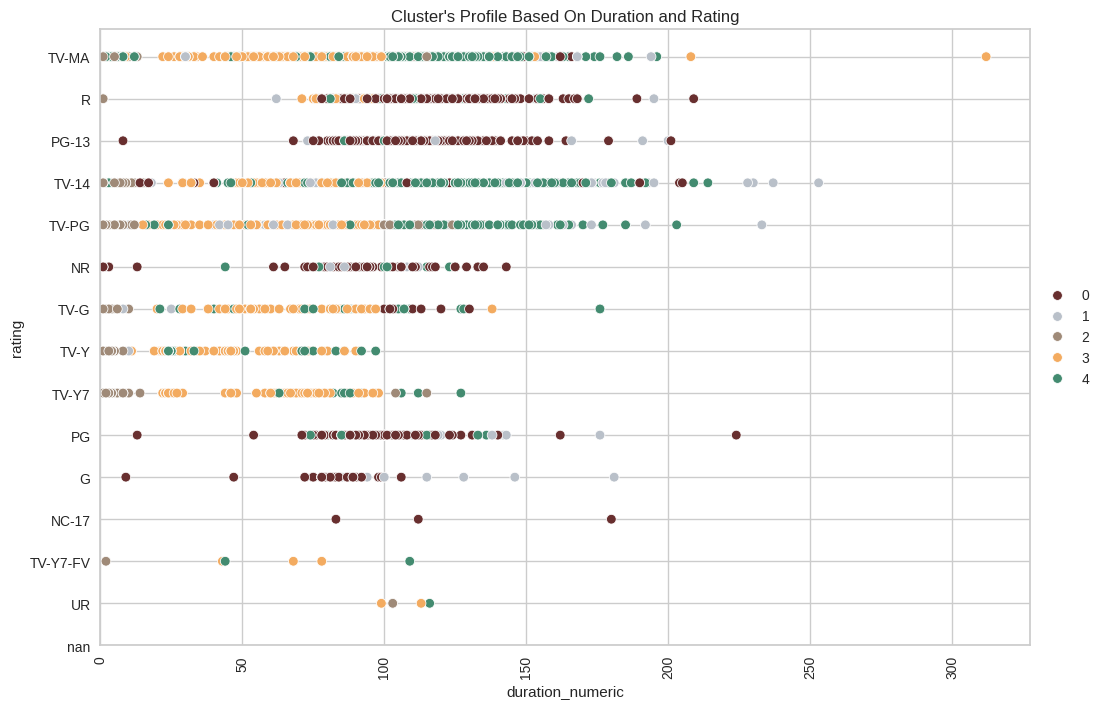

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert duration column to numerical values
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Scatterplot with numerical duration
plt.figure(figsize=(12, 8))
sns.scatterplot(data=PCA_ds, x=df["duration_numeric"], y=df["rating"], hue="Clusters", palette=pal)

plt.title("Cluster's Profile Based On Duration and Rating")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks and labels
plt.xticks(rotation=90)

# Get unique rating values as strings and convert them back to numerical if possible
unique_ratings = np.unique(df['rating'].astype(str))
numeric_ratings = []
for rating in unique_ratings:
    try:
        numeric_ratings.append(int(rating))  # Try converting to int
    except ValueError:
        numeric_ratings.append(rating)  # Keep as string if not possible

# Set y-axis ticks to the numerical labels
plt.yticks(numeric_ratings, numeric_ratings)

# Ensure x-axis starts from 0
plt.xlim(left=0)

plt.show()

This determines whether they belong to TV Shows or Movies. Also useful to cluster viewer suitability and similar ratings.\